Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Paul"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [3]:
import timeit
import random

eps = 1e-16                                 # very small number
N = 10000                                   
locations = [0.0, 0.5, 1.0 - eps]           # list storing 0, 0.5, and almost 1


def median(x1, x2, x3):
    """
    Find the median of three numbers. 
    
    Input: Three numbers.
    Output: Median of the three numbers. If equal numbers, return first number.
    
    """
    if (x1 < x2 < x3) or (x3 < x2 < x1):     # compare x2 with the other two numbers and if it is in the middle, return x2
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):   # compare x3 with the other two numbers and if it is in the middle, return x3
        return x3
    else:                                    # if neither x2 nor x3 are medians, return x1
        return x1

def qsort(lst):
    """
    Sorts inputted list.
    
    Input: list
    Output: sorted list
    
    """
    indices = [(0, len(lst))]                # create a list with the first and last index of inputted list

    while indices:                           # keep looping while indices is not empty
        (frm, to) = indices.pop()            # save the last element of indices as a tuple to indicate from and to
        if frm == to:                        # if from and to index is equal, loop again
            continue

        # Find the partition: 
        # (summary - compare first, middle, and last element and use the median as parititon)
        N = to - frm                         # find the "distance" between the end and starting index
        inds = [frm + int(N * n) for n in locations] # creating a list with three indices: start, middle, end
        values = [lst[ind] for ind in inds]  # creates a list with the first, middle, and last element of input
        partition = median(*values)          # input the three elements in values as the parameter for median and get median

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] # add any number less than the partition value to this list
        upper = [a for a in lst[frm:to] if a > partition] # add any number greater than the partition value to this list
        counts = sum([1 for a in lst[frm:to] if a == partition]) # if a number if equal to the partition, count how many there are

        ind1 = frm + len(lower)              # find the index where the lower partition ends
        ind2 = ind1 + counts                 # find the index where the uppder partition starts

        # Push back into correct place:
        lst[frm:ind1] = lower                # replace part of the input list with the lower partition
        lst[ind1:ind2] = [partition] * counts# add the repeating numbers after the lower partition
        lst[ind2:to] = upper                 # replace the rest of the input list with the upper partition

        # Enqueue other locations
        """
        the repeating numbers in the middle is sorted now so continue 
        looping with the potentially unsorted lower and upper parts
        
        """
        indices.append((frm, ind1))          # add back to the indices array the indices for the lower partition
        indices.append((ind2, to))           # add back to the indices array the indices for the upper partition
    return lst


def randomized_quicksort():
    """
    Test out the effect of random sampling in quick sort.
    
    Input: none
    Output: sorted list 
    """
    lst = [i for i in range(N)]              # we create an increasing list that reaches 10,000 in increments of 1
    random.shuffle(lst)                      # shuffle the list and randomize it
    return qsort(lst)                        # use quicksort on the large, randomly shuffled list


def test_quicksort():
    """
    Test the quicksort that takes a randomized input
    
    """
    lst = randomized_quicksort()             # sort a list using randomized_quicksort()
    assert (lst == [i for i in range(N)])    # see if it matches the sorted array


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))  # run 1 simulation of quicksort to see the time it takes

0.04528189999996357


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

RANDOMIZED-QUICKSORT randomizes the partition number, not the input list as "randomized_quicksort" does. The list stays the same but the RANDOMIZED-QUICKSORT finds a different partition number each time.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

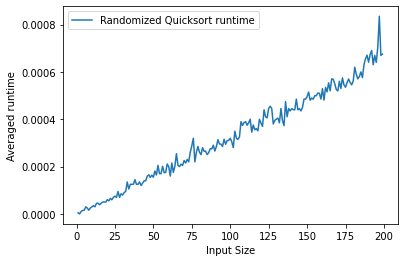

In [14]:
import time
n_experiments = 200      # number of simulations per input size
max_length = 200         # number of inputs we will test

timer = []
input_size = []
for k in range(1, max_length):                 # loop from 1 input size to max_length
    input_data = [a for a in range(k)]         # the input data will increase by 1 each loop
    end_timer = 0                              # variable to store total time after all the simulations run
    for run in range(n_experiments):           # number of simulations
        random.shuffle(input_data)             # shuffle the input data every simulation
        start_timer = time.time()              # start timer
        qsort(input_data)                      # run the quick sort function
        end_timer += time.time() - start_timer # calculate time it took and add to end_timer
    timer.append(end_timer/n_experiments)      # divide by number of simulations to get average
    input_size.append(k)                       # append input size to keep track of increasing input size

import matplotlib.pyplot as plt
plt.plot(input_size, timer, label = 'Randomized Quicksort runtime')
plt.xlabel('Input Size')
plt.ylabel('Averaged runtime')
plt.legend()

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [35]:
def qsort_v2(lst):
    """
    Sorts inputted list.
    
    Input: list
    Output: sorted list
    
    """
    indices = [(0, len(lst))]                # create a list with the first and last index of inputted list

    while indices:                           # keep looping while indices is not empty
        (frm, to) = indices.pop()            # save the last element of indices as a tuple to indicate from and to
        if frm == to:                        # if from and to index is equal, loop again
            continue

        # Find the partition: 
        # (summary - compare first, middle, and last element and use the median as parititon)
        N = to - frm                         # find the "distance" between the end and starting index
        inds = [frm + int(N * n) for n in locations] # creating a list with three indices: start, middle, end
        values = [lst[ind] for ind in inds]  # creates a list with the first, middle, and last element of input
        partition = median(*values)          # input the three elements in values as the parameter for median and get median

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] # add any number less than the partition value to this list
        upper = [a for a in lst[frm:to] if a >= partition] # add any number greater than OR EQUAL the partition value to this list
        # REMOVED THIS LINE FROM PREVIOUS CODE
        
        ind1 = frm + len(lower)              # find the index where the lower partition ends
        # REMOVED THIS LINE FROM PREVIOUS CODE
        
        # Push back into correct place:
        lst[frm:ind1] = lower                # replace part of the input list with the lower partition
        # REMOVED THIS LINE FROM PREVIOUS CODE
        lst[ind1+1:to] = upper               # replace the rest of the input list with the upper partition

        # Enqueue other locations
        indices.append((frm, ind1))          # add back to the indices array the indices for the lower partition
        indices.append((ind1+1, to))         # add back to the indices array the indices for the upper partition
    return lst

print(qsort_v2([4,2,1]))

[1, 1, 2, 4, 4, 2]


In [16]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

AssertionError: 

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

KeyboardInterrupt: 

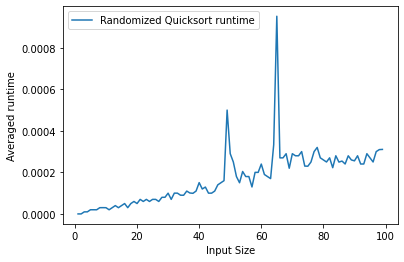

In [38]:
import matplotlib.pyplot as plt
import time

def time_quicksort(alg):
    n_experiments = 100      # number of simulations per input size
    max_length = 100         # number of inputs we will test

    timer = []
    input_size = []
    for k in range(1, max_length):                 # loop from 1 input size to max_length
        input_data = [a for a in range(k)]         # the input data will increase by 1 each loop
        end_timer = 0                              # variable to store total time after all the simulations run
        for run in range(n_experiments):           # number of simulations
            random.shuffle(input_data)             # shuffle the input data every simulation
            start_timer = time.time()              # start timer
            alg(input_data)                        # run the quick sort function
            end_timer += time.time() - start_timer # calculate time it took and add to end_timer
        timer.append(end_timer/n_experiments)      # divide by number of simulations to get average
        input_size.append(k)                       # append input size to keep track of increasing input size

    plt.plot(input_size, timer, label = 'Randomized Quicksort runtime')
    plt.xlabel('Input Size')
    plt.ylabel('Averaged runtime')
    plt.legend()
    
time_quicksort(qsort)
time_quicksort(qsort_v2)

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
def qsort(lst):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
# couldn't get problem 4 to work properly... worked on it for an a while
raise NotImplementedError()

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


YOUR ANSWER HERE